In [1]:
import pandas as pd
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# read data
data_train = pd.read_csv('WorldCupMatches.csv') 
# drop nan rows
data_train.dropna(axis=0, how='any', inplace=True)
# drop duplicate rows
data_train.drop_duplicates(inplace=True)

In [3]:
# only using the data from the Group Stage
data_train = data_train[
    data_train['Stage'].isin(
        ['Group A','Group B','Group C','Group D','Group E','Group F','Group G','Group H'])]
# only using data since 1986
data_train = data_train[data_train['Year']>=1986]
# reset the index
data_train.reset_index(inplace=True);

In [4]:
data_train['Year'].value_counts()

2014.0    48
2002.0    48
1998.0    48
2006.0    48
2010.0    48
1990.0    36
1994.0    36
1986.0    36
Name: Year, dtype: int64

In [5]:
data_train.head()

,index,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,...,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,360,1986.0,31 May 1986 - 12:00,Group A,Estadio Azteca,Mexico City,Bulgaria,1.0,1.0,Italy,...,96000.0,0.0,1.0,FREDRIKSSON Erik (SWE),CODESAL MENDEZ Edgardo (MEX),ROTH Volker (GER),308.0,459.0,BUL,ITA
1,361,1986.0,01 Jun 1986 - 16:00,Group C,Nou Camp - Estadio Le�n,Leon,Canada,0.0,1.0,France,...,65500.0,0.0,0.0,SILVA ARCE Hernan (CHI),MENDEZ MOLINA Romulo (GUA),ULLOA MORERA Berny (CRC),308.0,468.0,CAN,FRA
2,362,1986.0,01 Jun 1986 - 12:00,Group D,Jalisco,Guadalajara,Spain,0.0,1.0,Brazil,...,35748.0,0.0,0.0,BAMBRIDGE Christopher (AUS),SOCHA David (USA),KEIZER Jan (NED),308.0,439.0,ESP,BRA
3,363,1986.0,02 Jun 1986 - 12:00,Group C,Estadio Irapuato,Irapuato,Soviet Union,6.0,0.0,Hungary,...,16500.0,3.0,0.0,AGNOLIN Luigi (ITA),COURTNEY George (ENG),BRUMMEIER Horst (AUT),308.0,610.0,URS,HUN
4,364,1986.0,02 Jun 1986 - 12:00,Group A,Estadio Ol�mpico Universitario,Mexico City,Argentina,3.0,1.0,Korea Republic,...,60000.0,2.0,0.0,SANCHEZ ARMINIO Victoriano (ESP),GONZALEZ ROA Gabriel (PAR),DIAZ PALACIO Jesus (COL),308.0,395.0,ARG,KOR


In [6]:
# get a subset of the columns
data_train = data_train[['Year','Home Team Goals',
                         'Away Team Goals','Home Team Initials','Away Team Initials']]

In [7]:
# Creates a column with the number of winning and losing goals
data_train['Win Goals'] = data_train[['Home Team Goals','Away Team Goals']].max(axis=1)
data_train['Lose Goals'] = data_train[['Home Team Goals','Away Team Goals']].min(axis=1)

In [8]:
def Win_Team_Func(data_row):
    if data_row['Home Team Goals'] >= data_row['Away Team Goals']:
        return data_row['Home Team Initials']
    else:
        return data_row['Away Team Initials']
data_train['Win Team'] = data_train.apply(Win_Team_Func,axis=1)

In [9]:
def Lose_Team_Func(data_row):
    if data_row['Home Team Goals'] >= data_row['Away Team Goals']:
        return data_row['Away Team Initials']
    else:
        return data_row['Home Team Initials']
data_train['Lose Team'] = data_train.apply(Lose_Team_Func,axis=1)

In [10]:
# creates a column with ties
data_train['Tie']=data_train['Win Goals']==data_train['Lose Goals']

In [11]:
# drops columns not needed
clmns = ['Home Team Goals','Away Team Goals','Home Team Initials','Away Team Initials']
data_train.drop(labels=clmns,axis=1, inplace=True)
data_train.head()

,Year,Win Goals,Lose Goals,Win Team,Lose Team,Tie
0,1986.0,1.0,1.0,BUL,ITA,True
1,1986.0,1.0,0.0,FRA,CAN,False
2,1986.0,1.0,0.0,BRA,ESP,False
3,1986.0,6.0,0.0,URS,HUN,False
4,1986.0,3.0,1.0,ARG,KOR,False


In [72]:
data_test = pd.read_excel('Scores.xlsx','2018') # testing data from 2018
data_test.columns = ['Win Team','Lose Team','Win Goals','Lose Goals','Tie','x'] # renames columns
data_test.drop(['x'],axis=1,inplace=True) # drops a column

Total_Games = 48 # number of games in total
data_test.head()


,Win Team,Lose Team,Win Goals,Lose Goals,Tie
0,Russia,Saudi Arabia,5,0,0
1,Uruguay,Egypt,1,0,0
2,Iran,Morroco,1,0,0
3,Portugal,Spain,3,3,1
4,France,Australia,2,1,0


In [13]:
def Outcome(data):
    if data.Wscore>data.Lscore:
        return(data.Winner)
    else:
        return 'T'

In [14]:
True_Table_Test = ([Outcome(data_test.iloc[i]) for i in range(Total_Games)])

True_Table_Test[0:5]

['Russia', 'Uruguay ', 'Iran', 'T', 'France']

In [15]:
unique_years = data_train['Year'].unique()

In [16]:
from collections import defaultdict

def CreateWLT_Matrix(temp_data):
    Country_score = defaultdict(list)
    for i in range(len(temp_data)):
        # if it is a tie
        if temp_data.iloc[i]['Tie'] == True:
            Country_score[temp_data.iloc[i]['Win Team']].append('T')
            Country_score[temp_data.iloc[i]['Lose Team']].append('T')
        else:
            Country_score[temp_data.iloc[i]['Win Team']].append('W')
            Country_score[temp_data.iloc[i]['Lose Team']].append('L')
    return Country_score

In [36]:
def Create_Features(temp_data,Country_score,Features):
    Country_game = defaultdict(int)


    for i in range(len(temp_data)):

        
        if Country_score[temp_data.iloc[i]['Win Team']][0] == 'W':
            A_points_1 = 3
        elif Country_score[temp_data.iloc[i]['Win Team']][0] == 'L':
            A_points_1 = 0
        elif Country_score[temp_data.iloc[i]['Win Team']][0] == 'T':
            A_points_1 = 1
        if Country_score[temp_data.iloc[i]['Lose Team']][0] == 'W':
            B_points_1 = 3
        elif Country_score[temp_data.iloc[i]['Lose Team']][0] == 'L':
            B_points_1 = 0
        elif Country_score[temp_data.iloc[i]['Lose Team']][0] == 'T':
            B_points_1 = 1

        if Country_score[temp_data.iloc[i]['Win Team']][1] == 'W':
            A_points_2 = 3
        elif Country_score[temp_data.iloc[i]['Win Team']][1] == 'L':
            A_points_2 = 0
        elif Country_score[temp_data.iloc[i]['Win Team']][1] == 'T':
            A_points_2 = 1
        if Country_score[temp_data.iloc[i]['Lose Team']][1] == 'W':
            B_points_2 = 3
        elif Country_score[temp_data.iloc[i]['Lose Team']][1] == 'L':
            B_points_2 = 0
        elif Country_score[temp_data.iloc[i]['Lose Team']][1] == 'T':
            B_points_2 = 1        
        
        if Country_game[temp_data.iloc[i]['Win Team']] == 0: # first game
            if temp_data.iloc[i]['Tie'] == True:
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],0,0,'T']],columns=columns)
                Features = Features.append(temp)
                Features = Features.append(temp) # we do it twice to account A and B swapping

            else:    
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],0,0,'A']],columns=columns)
                Features = Features.append(temp)
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],0,0,'B']],columns=columns)
                Features = Features.append(temp) 

        elif Country_game[temp_data.iloc[i]['Win Team']] == 1: # second game
                        
            if temp_data.iloc[i]['Tie'] == True:
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      A_points_1,B_points_1,'T']],columns=columns)
                Features = Features.append(temp)
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      B_points_1,A_points_1,'T']],columns=columns)
                Features = Features.append(temp) 

                
            else:    
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      A_points_1,B_points_1,'A']],columns=columns)
                Features = Features.append(temp)
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      B_points_1,A_points_1,'B']],columns=columns)
                Features = Features.append(temp) 

        elif Country_game[temp_data.iloc[i]['Win Team']] == 2: # third game
            if temp_data.iloc[i]['Tie'] == True:
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      A_points_1+A_points_2,B_points_1+B_points_2,'T']],columns=columns)
                Features = Features.append(temp)
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      B_points_1+B_points_2,A_points_1+A_points_2,'T']],columns=columns)
                Features = Features.append(temp) 

                
            else:    
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      A_points_1+A_points_2,
                                      B_points_1+B_points_2,'A']],columns=columns)
                Features = Features.append(temp)
                temp = pd.DataFrame([[Country_game[temp_data.iloc[i]['Win Team']],
                                      B_points_1+B_points_2,
                                      A_points_1+A_points_2,'B']],columns=columns)
                Features = Features.append(temp) 
                
    
        Country_game[temp_data.iloc[i]['Win Team']] += 1
        Country_game[temp_data.iloc[i]['Lose Team']] += 1
    return Features

In [37]:
columns = ['Game','TeamA_points','TeamB_points','Outcome']
Features = pd.DataFrame(columns=columns) # outcome is Team A, Team B or Tie
for iYear in unique_years:
    temp_data = data_train[data_train['Year']==iYear]
    Country_score = CreateWLT_Matrix(temp_data)
#     print(type(Country_score))
    Features = Create_Features(temp_data,Country_score, Features)
Features.reset_index(inplace=True)

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [39]:
X = Features[['Game','TeamA_points','TeamB_points']]

y = Features[['Outcome']]

In [60]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

In [61]:
clf = RandomForestClassifier(max_depth=1,random_state=0)
clf.fit(X_train, y_train)
y_pred = pd.DataFrame(clf.predict(X_test),columns=[['Outcome']])

/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [62]:
y_test.reset_index(inplace=True)
(y_pred['Outcome']==y_test['Outcome']).sum()/(y_pred['Outcome']==y_test['Outcome']).count()

0.45000000000000001

In [151]:
columns = ['Game','TeamA_points','TeamB_points','Outcome']
Features_Test = pd.DataFrame(columns=columns) # outcome is Team A, Team B or Tie
temp_data = data_test
Country_score = CreateWLT_Matrix(temp_data)
Features_Test = Create_Features(temp_data,Country_score, Features_Test)
Features_Test.reset_index(inplace=True)

In [152]:
X_train = Features[['Game','TeamA_points','TeamB_points']]
y_train = Features[['Outcome']]

X_test = Features[['Game','TeamA_points','TeamB_points']]
y_test = Features[['Outcome']]

In [134]:
clf = RandomForestClassifier(max_depth=6,random_state=0)
clf.fit(X_train, y_train)
y_pred = pd.DataFrame(clf.predict(X_test),columns=[['Outcome']])

/Users/robertomac/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


In [135]:
y_test.reset_index(inplace=True)
(y_pred['Outcome']==y_test['Outcome']).sum()/(y_pred['Outcome']==y_test['Outcome']).count()

0.45402298850574713

In [153]:
model = DecisionTreeClassifier(max_depth=8,random_state=0)
model.fit(X_train,y_train)
y_pred = pd.DataFrame(model.predict(X_test),columns=[['Outcome']])

In [154]:
y_test.reset_index(inplace=True)
(y_pred['Outcome']==y_test['Outcome']).sum()/(y_pred['Outcome']==y_test['Outcome']).count()

0.46839080459770116

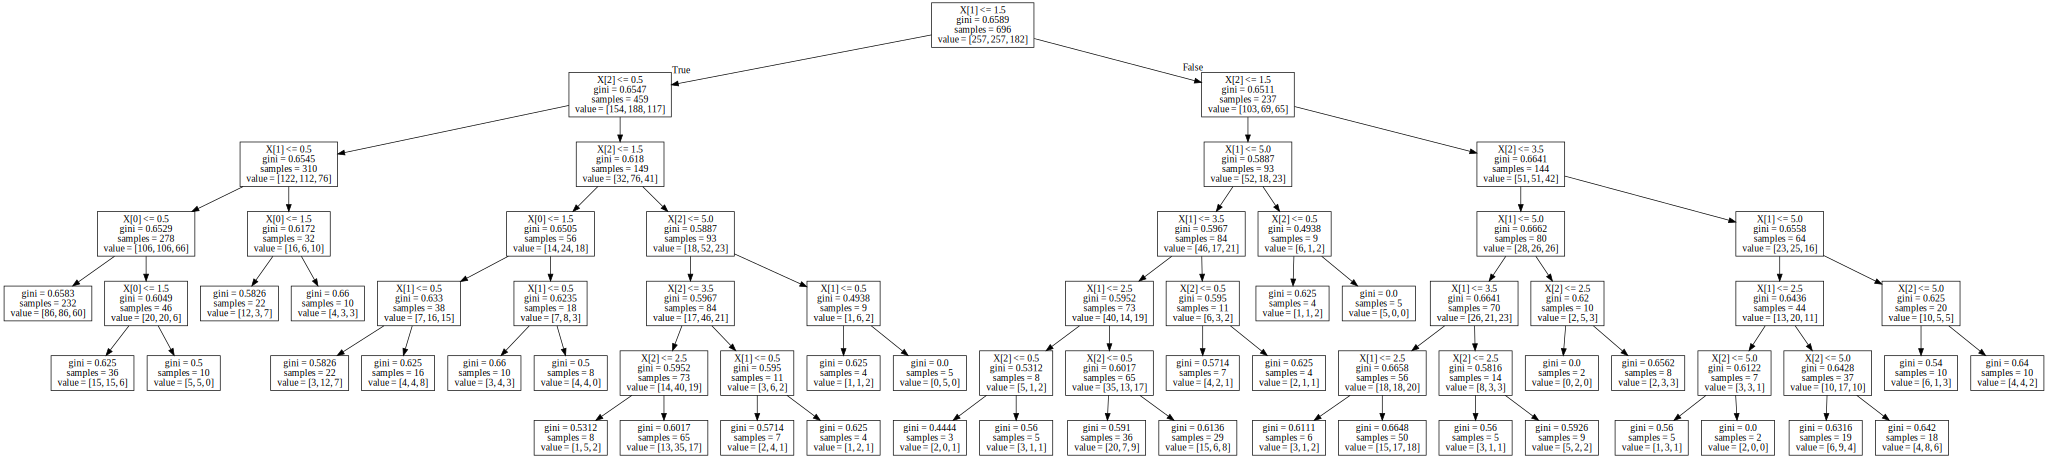

In [147]:
from sklearn import tree
import graphviz

tree.export_graphviz(model,out_file='tree.dot')

with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [156]:
len(Features)/2

348.0